In [1]:
import nltk; nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
import textblob

# Plotting tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [3]:
%cd "D:\Pranav_Files\Northwestern University\Classes\MSDS_498_Capstone_Project\Data and Git\Capstone_Project\data\Final_data\"

D:\Pranav_Files\Northwestern University\Classes\MSDS_498_Capstone_Project\Data and Git\Capstone_Project\data\Final_data


In [4]:
df= pd.read_csv("lement_but_not_removing_stop.csv")

In [5]:
df["class"].unique()

array(['suicide', 'casual-talk', 'depression', 'high-suicidal',
       'stressed'], dtype=object)

<AxesSubplot: >

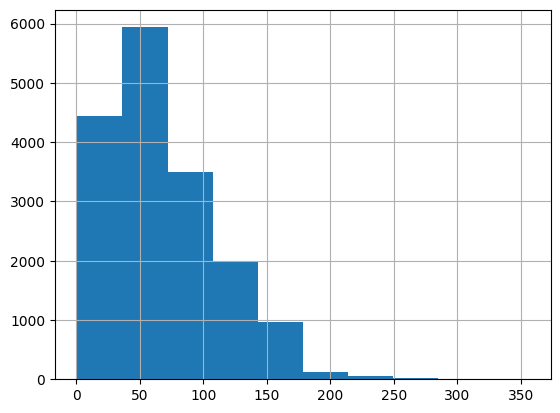

In [6]:
df["final_cleaned_textt"].apply(lambda x: len(set(str(x).split()))).hist()


<AxesSubplot: >

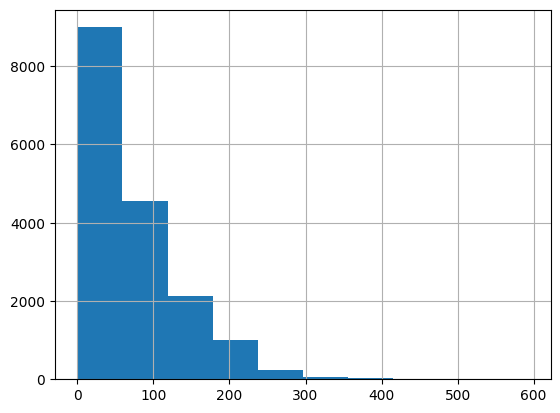

In [7]:
from wordcloud import STOPWORDS
### Other way to retrieve stopwords
# import nltk
# nltk.download(‘stopwords’)
# stopwords =set(stopwords.words(‘english’))
df["final_cleaned_textt"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words])).hist()

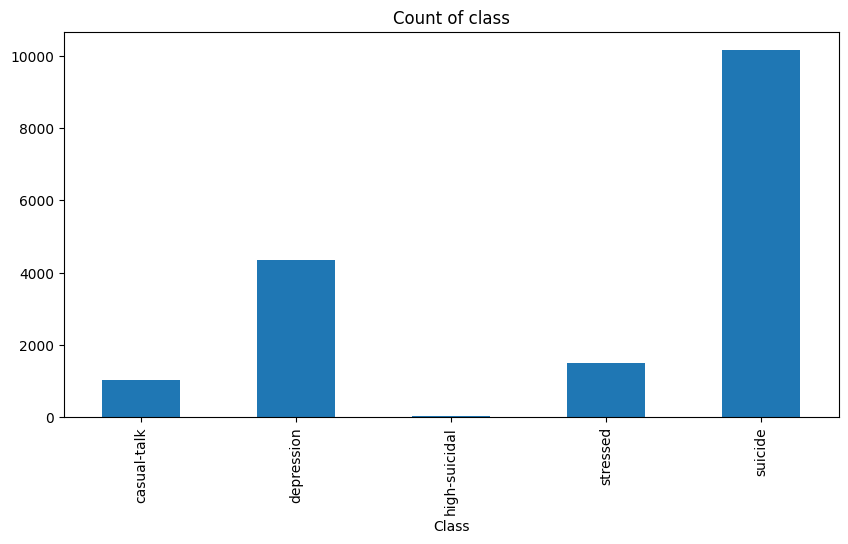

In [8]:
ax = df['class'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of class',
          figsize=(10, 5))
ax.set_xlabel('Class')
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer 

In [10]:
from textblob import TextBlob
df['polarity'] = df['final_cleaned_textt'].apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df['final_cleaned_textt'].apply(lambda x: TextBlob(x).subjectivity)

In [11]:
def ngrams_top(corpus, ngram_range, n=None):
    ### What this function does: List the top n words in a vocabulary according to occurrence in a text corpus.
    vec = CountVectorizer(stop_words = "english", ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df = pd.DataFrame(total_list, columns=["text","count"])
    return df

In [13]:
suicide=df[df["class"]=="suicide"]
casual_talk=df[df["class"]=="casual-talk"]
depression=df[df["class"]=="depression"]
high_suicidal=df[df["class"]=="high-suicidal"]
stressed=df[df["class"]=="stressed"]


# Analyzing Suicide Text**

In [14]:
suicide[["polarity", "subjective"]]

,polarity,subjective
0,-0.146468,0.534583
1,-0.034524,0.457124
2,-0.150000,0.350000
3,-0.050617,0.306636
4,-0.125000,0.375000
...,...,...
10157,-0.186000,0.660000
10158,0.037912,0.487546
10159,-0.256250,0.710417
10160,-0.081481,0.596759


In [15]:
sum(suicide["subjective"])

5310.726734447351

In [16]:
sum(suicide["polarity"])

-266.524406125122

In [17]:
sum(depression["polarity"])

-52.794570050715954

In [18]:
sum(casual_talk["polarity"])

47.61752317116452

In [19]:
sum(high_suicidal["polarity"])

-0.15945100282271338

In [20]:
sum(stressed["polarity"])

-31.813750981970703

# Setting Num of top words

In [21]:
uni_gram_num=50

In [25]:
unigram_df = ngrams_top(suicide["final_cleaned_textt"], (1,1), n=uni_gram_num)



In [26]:
unigram_df[:30]

,text,count
0,just,13265
1,want,11209
2,feel,9284
3,like,7993
4,know,7990
5,life,7354
6,think,5734
7,time,4689
8,make,4634
9,try,4306


In [27]:
# fancier interactive plot using plotly express
import plotly.express as px
fig = px.bar(unigram_df, x='text', y='count', title="Counts of top unigrams", template='plotly_white', 
             labels={"ngram;: 'Unigram', 'count': 'Count'"},
            width=1000, height=600)
                                                                                                                  
fig.show()

In [28]:
from wordcloud import WordCloud

In [29]:
text = " ".join(word for word in suicide["final_cleaned_textt"])

In [30]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

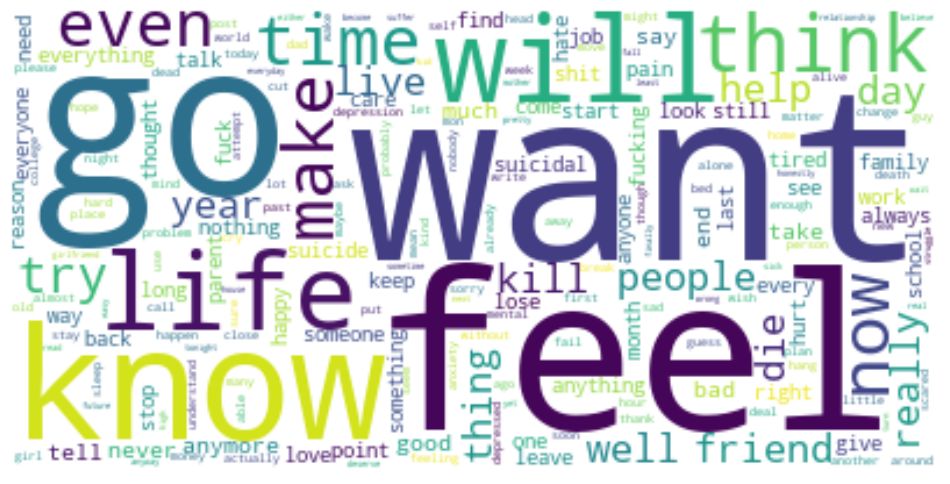

In [31]:
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))


# matrix of ngrams
ngrams = c_vec.fit_transform(suicide['final_cleaned_textt'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_




df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [33]:
df_ngram[:30]

,frequency,bigram/trigram
0,3341,feel like
1,1293,want die
2,913,get well
3,533,want kill
4,505,year old
5,496,every day
6,469,get bad
7,466,make feel
8,451,suicidal thought
9,424,really want


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,4))





# matrix of ngrams
ngrams = c_vec.fit_transform(suicide['final_cleaned_textt'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_




df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [35]:
df_ngram[:30]

,frequency,bigram/trigram
0,159,want die want
1,142,help please help
2,140,please help please
3,133,please help please help
4,131,help please help please
5,106,want live anymore
6,106,thing get well
7,101,make feel like
8,93,need someone talk
9,89,feel like shit


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=40)
pipe = make_pipeline(tfidf_vectorizer, nmf)



pipe.fit(suicide['final_cleaned_textt'])




def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
        print()
    print()


In [37]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Topic #0: feel like, life feel, life feel like


Topic #1: someone talk, need someone, need someone talk


Topic #2: want die, die want, want die want


Topic #3: help please, help please help, please help please


Topic #4: please help, someone please help, please help need


Topic #5: get well, thing get well, thing get


Topic #6: talk someone, need talk, need talk someone


Topic #7: want kill, kill want, want kill want


Topic #8: commit suicide, want commit suicide, want commit


Topic #9: fuck fuck, fuck fuck fuck, die fuck fuck


Topic #10: want live, live anymore, want live anymore


Topic #11: really want, really want die, want die


Topic #12: want fucking, want fucking die, fucking die


Topic #13: need help, help delete, need help delete


Topic #14: go kill, think go, think go kill


Topic #15: want end, end life, want end life


Topic #16: get bad, bad bad, get bad bad


Topic #17: want go, want anymore, anymore want


Topic #18: wish could, could go, wish could go


Top

In [38]:
from sklearn.decomposition import LatentDirichletAllocation


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=40)
pipe = make_pipeline(tfidf_vectorizer, lda)


pipe.fit(suicide["final_cleaned_textt"])



def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
    print()

In [39]:
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: feel like, want die, first time

Topic #1: feel like, get well, want kill

Topic #2: feel like, want die, suicidal thought

Topic #3: feel like, want die, get well

Topic #4: feel like, want kill, want die

Topic #5: feel like, really want, help help

Topic #6: feel like, want die, get well

Topic #7: feel like, want die, talk someone

Topic #8: feel like, want die, go kill

Topic #9: feel like, want die, commit suicide

Topic #10: feel like, spend rest, spend rest life

Topic #11: feel like, want die, go kill

Topic #12: feel like, help please help, help please

Topic #13: feel like, want die, get well

Topic #14: feel like, wish could, want die

Topic #15: feel like, want die, edge fuck

Topic #16: feel like, fuck fuck, fuck fuck fuck

Topic #17: feel like, want die, thank take time

Topic #18: feel like, want die, world september

Topic #19: feel like, jump front, front train

Topic #20: feel like, want die, get well

Topic #21: feel like, want die, get well

Topic #22: fe

# 

# Analyzing Depression Text**

In [40]:
unigram_df = ngrams_top(depression["final_cleaned_textt"], (1,1), n=uni_gram_num)
unigram_df[:40]


,text,count
0,just,5058
1,feel,4891
2,like,4135
3,want,3448
4,know,3029
5,don,2648
6,life,2500
7,time,2236
8,think,2172
9,make,2073


In [41]:
# fancier interactive plot using plotly express
import plotly.express as px
fig = px.bar(unigram_df, x='text', y='count', title="Counts of top unigrams", template='plotly_white', 
             labels={"ngram;: 'Unigram', 'count': 'Count'"},
            width=1000, height=600)
                                                                                                                  
fig.show()

In [42]:
text = " ".join(word for word in depression["final_cleaned_textt"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

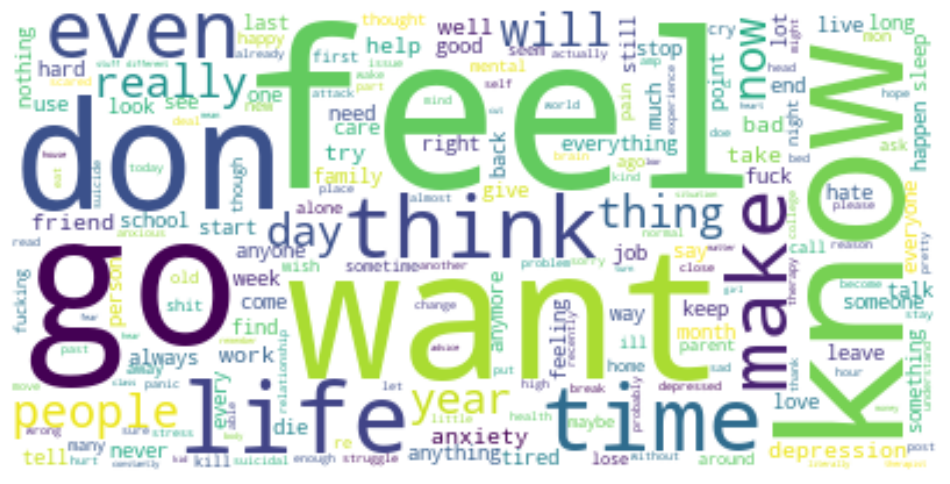

In [43]:
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))


# matrix of ngrams
ngrams = c_vec.fit_transform(depression['final_cleaned_textt'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [48]:
df_ngram[:40]

,frequency,bigram/trigram
0,1753,feel like
1,261,mental health
2,256,get well
3,255,make feel
4,211,panic attack
5,207,every day
6,191,even though
7,182,help co
8,182,anyone else
9,180,want die


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,4))


# matrix of ngrams
ngrams = c_vec.fit_transform(depression['final_cleaned_textt'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [50]:
df_ngram[:40]

,frequency,bigram/trigram
0,59,make feel like
1,53,feel like shit
2,39,mental health issue
3,39,feel like go
4,38,make feel well
5,37,play video game
6,37,doe anyone else
7,36,life feel like
8,33,want die want
9,33,sometimes feel like


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, nmf)



pipe.fit(depression['final_cleaned_textt'])




def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
        print()
    print()


In [52]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Topic #0: disorder book, platform essentially connect, essentially connect certify


Topic #1: thelma herb, trauma anxiety depression, trauma anxiety


Topic #2: feel like, like shit, feel like shit


Topic #3: depression anxiety, thee ween, thelma herb


Topic #4: help co, depression help co, depression help


Topic #5: like live, feel kind confident, fog bad accent


Topic #6: thee ween help, ween help, witness something


Topic #7: get well, every day, anyone else


Topic #8: mental health, health depression, mental health depression


Topic #9: go away, want happy, anymore want


Topic #10: want die, die want, want die want


Topic #11: brain bleed, would know, would know brain


Topic #12: feel well, make feel, make feel well


Topic #13: back depression, spiral back depression, spiral back


Topic #14: past year, general anxiety arrest, therapist week


Topic #15: convince parent, move state, get fight


Topic #16: word depression, coin really know, sanity lose


Topic #17: feel 

In [53]:
from sklearn.decomposition import LatentDirichletAllocation


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, lda)


pipe.fit(depression["final_cleaned_textt"])



def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
    print()

In [54]:
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: feel like, want die, get bad

Topic #1: feel like, depression anxiety loss, anxiety loss

Topic #2: feel like, help co, mental health

Topic #3: feel like, need help, get well

Topic #4: feel like, witness something, suffer depression anxiety

Topic #5: feel like, help co, also turkish

Topic #6: feel like, get well, every time

Topic #7: feel like, help co, mental health

Topic #8: feel like, hamza help, ween hull

Topic #9: feel like, common like, even know

Topic #10: feel like, make feel, help co

Topic #11: thelma herb, thee ween, love thelma herb

Topic #12: feel like, mental health, seem like

Topic #13: help co, suffer mental health, online therapy platform

Topic #14: feel like, try try, help co

Topic #15: feel like, anyone else, break depression

Topic #16: feel like, help co, get bad

Topic #17: feel like, video game, help co

Topic #18: feel like, feel know, help co

Topic #19: feel like, mental health, gel bonsai




 # 
 # Analyzing Casual Text

In [55]:
sum(casual_talk["polarity"])

47.61752317116452

In [56]:
unigram_df = ngrams_top(casual_talk["final_cleaned_textt"], (1,1), n=uni_gram_num)
unigram_df[:40]


,text,count
0,just,450
1,like,425
2,want,322
3,know,264
4,say,236
5,make,230
6,filler,207
7,think,190
8,friend,188
9,people,182


In [57]:
# fancier interactive plot using plotly express
import plotly.express as px
fig = px.bar(unigram_df, x='text', y='count', title="Counts of top unigrams", template='plotly_white', 
             labels={"ngram;: 'Unigram', 'count': 'Count'"},
            width=1000, height=600)
                                                                                                                  
fig.show()

In [58]:
text = " ".join(word for word in casual_talk["final_cleaned_textt"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

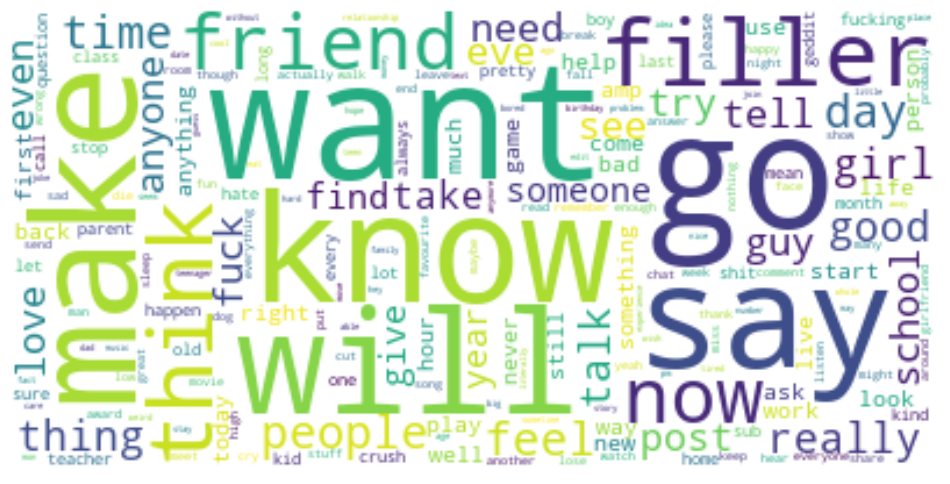

In [59]:
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))


# matrix of ngrams
ngrams = c_vec.fit_transform(casual_talk['final_cleaned_textt'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [61]:
df_ngram[:40]

,frequency,bigram/trigram
0,188,filler filler
1,172,filler filler filler
2,96,eve eve
3,95,eve eve eve
4,54,feel like
5,43,amp amp
6,38,amp amp amp
7,27,anyone want
8,21,good friend
9,20,want talk


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,4))


# matrix of ngrams
ngrams = c_vec.fit_transform(casual_talk['final_cleaned_textt'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [63]:
df_ngram[:40]

,frequency,bigram/trigram
0,172,filler filler filler
1,156,filler filler filler filler
2,95,eve eve eve
3,94,eve eve eve eve
4,38,amp amp amp
5,35,amp amp amp amp
6,10,text text text
7,9,text text text text
8,8,filer filer filer
9,7,filer filer filer filer


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, nmf)



pipe.fit(casual_talk['final_cleaned_textt'])




def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
        print()
    print()


C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



In [65]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: filler filler, filler filler filler, ruby filler filler


Topic #1: amp amp, amp amp amp, funny number


Topic #2: want talk, anyone want talk, anyone want


Topic #3: girlfriend turn, first girlfriend turn, first girlfriend


Topic #4: free award, get free award, get free


Topic #5: get lay, amusing fact, amusing fact get


Topic #6: feel like, ever feel, ever feel like


Topic #7: mega thick, dear mega, dear mega thick


Topic #8: want die, die get, want die get


Topic #9: want chat, anyone want, anyone want chat


Topic #10: sub edit, teenager sub, teenager sub edit


Topic #11: anyone else, else get, anyone else get


Topic #12: group chat, want join, fill fill


Topic #13: go die, go die alone, die alone


Topic #14: people play, look people, look people play


Topic #15: alt account, make alt, alt account alt


Topic #16: listen song, video listen song, ignore video listen


Topic #17: good friend, say like, say yes


Topic #18: fem boy, favourite variant, fem boy fem

C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [66]:
from sklearn.decomposition import LatentDirichletAllocation


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, lda)


pipe.fit(casual_talk["final_cleaned_textt"])



def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
    print()

In [67]:
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: today birthday, thank answer, end thing boyfriend

Topic #1: alt account, put ice, anyone want

Topic #2: filler filler, filler filler filler, feel like

Topic #3: alien abduct, puff valid, go sub

Topic #4: view risk, filer filer, filer filer filer

Topic #5: shit post, join navy, plan join

Topic #6: want die, eat pizza want, pizza want

Topic #7: grow beard, really really, many cup

Topic #8: fucking idiot, today fine, get fever

Topic #9: huge cap large, huge cap, cap large

Topic #10: anyone want, eve eve, eve eve eve

Topic #11: fun fact, favourite variant, mega thick valentine

Topic #12: text text, text text text, challenge anything

Topic #13: honestly need pant, want carboy, need pant

Topic #14: girl find hilarious, find hilarious, girl find

Topic #15: tow imposter, look amp, standard sorry

Topic #16: utmost importance, huh huh, horny post

Topic #17: amp amp, amp amp amp, make alt

Topic #18: virginity yesterday boy, yesterday boy, girlfriend could

Topic #19: r

# 
# Analyzing Stressed Text**

In [68]:
sum(stressed["polarity"])

-31.813750981970703

In [70]:
unigram_df = ngrams_top(stressed["final_cleaned_textt"], (1,1), n=uni_gram_num)
unigram_df[:40]


,text,count
0,feel,852
1,just,823
2,like,773
3,know,697
4,time,530
5,want,477
6,make,432
7,think,418
8,tell,375
9,really,373


In [71]:
# fancier interactive plot using plotly express
import plotly.express as px
fig = px.bar(unigram_df, x='text', y='count', title="Counts of top unigrams", template='plotly_white', 
             labels={"ngram;: 'Unigram', 'count': 'Count'"},
            width=1000, height=600)
                                                                                                                  
fig.show()

In [72]:
text = " ".join(word for word in stressed["final_cleaned_textt"])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

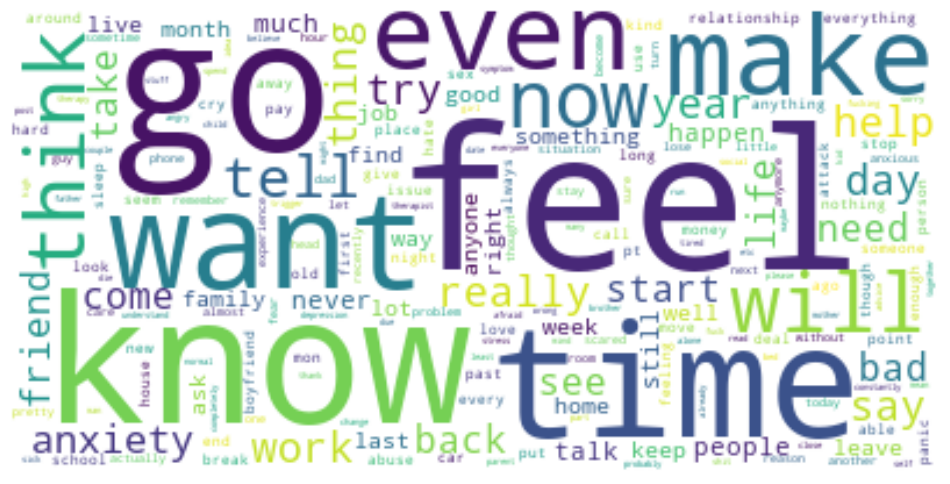

In [73]:
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))


# matrix of ngrams
ngrams = c_vec.fit_transform(stressed['final_cleaned_textt'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [75]:
df_ngram[:40]

,frequency,bigram/trigram
0,309,feel like
1,77,panic attack
2,51,make feel
3,48,go back
4,45,year old
5,44,even though
6,43,anyone else
7,36,month ago
8,33,try get
9,31,come back


In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stoplist = stopwords.words('english')


c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,4))


# matrix of ngrams
ngrams = c_vec.fit_transform(stressed['final_cleaned_textt'])





# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [77]:
df_ngram[:40]

,frequency,bigram/trigram
0,13,make feel like
1,11,long story short
2,11,know feel like
3,10,feel like go
4,8,mental health issue
5,8,feel like shit
6,7,would greatly appreciate
7,7,make feel bad
8,7,feel like need
9,6,time feel like


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, nmf)



pipe.fit(stressed['final_cleaned_textt'])




def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
        print()
    print()


In [79]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: feel like, know feel, know feel like


Topic #1: middle school like, help molest, express emotion


Topic #2: account need, want minimum, instead academic lot


Topic #3: soon possible, look full house, type situation room


Topic #4: place put, people life really, sorry need place


Topic #5: find friend stay, even license literally, unsure currently unemployed


Topic #6: panic attack often, absolutely necessary like, work something service


Topic #7: even though try, time weight, summary complete


Topic #8: everyday depress, less compare, depression anything memory


Topic #9: social service, mentally ill, safety security guy


Topic #10: many way, way feel, feel awful


Topic #11: never ever think, ever think, never ever


Topic #12: scared find love, find love, scared find


Topic #13: feel bad, make feel, make feel bad


Topic #14: panic attack, heart attack, attack get


Topic #15: need help, help need, really need


Topic #16: today really bad, today really, really 

C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [80]:
from sklearn.decomposition import LatentDirichletAllocation


tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=20)
pipe = make_pipeline(tfidf_vectorizer, lda)


pipe.fit(stressed["final_cleaned_textt"])



def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print()
    print()

In [81]:
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: feel like, soon possible, want stop

Topic #1: feel like, feel guilty, heart attack

Topic #2: feel like, fault feel like, seem like

Topic #3: feel like, know need, get job

Topic #4: feel like, make feel, feel super

Topic #5: feel like, sleep light, take care

Topic #6: feel like, year old, panic attack

Topic #7: feel like, get point, house school

Topic #8: every day, feel like, get sex

Topic #9: go back, know trust, panic attack

Topic #10: feel like, anyone else, seem work

Topic #11: feel like, move back, even though

Topic #12: feel like, thing like, go away

Topic #13: feel like, try get, week ago

Topic #14: feel like, sleep sleep, get well

Topic #15: feel like, come home, like good

Topic #16: feel like, help break, baby girl

Topic #17: leave house, feel like, find way

Topic #18: feel bad, feel like, month ago

Topic #19: feel like, like know, could go


